A confusion matrix is a table used to evaluate the performance of a classification model. It compares the actual values (true labels) with the predicted values from the model.

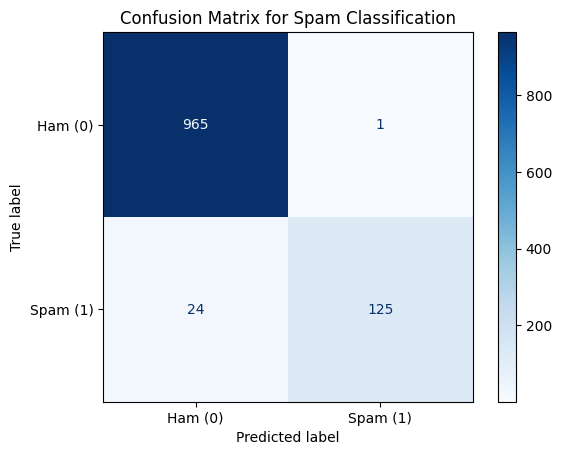

Accuracy: 0.98
Precision: 0.99
Recall: 0.84
F1 Score: 0.91


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Load dataset
file_path = "/content/email.csv"
df = pd.read_csv(file_path)

# Convert labels to binary (ham = 0, spam = 1)
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

# Remove any missing values
df = df.dropna(subset=['Category', 'Message'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naïve Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham (0)", "Spam (1)"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Spam Classification")
plt.show()

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
